<a href="https://colab.research.google.com/github/ShriVarshaan/pytorch-learning-log/blob/main/pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

##Preparing and loading data

* Excel spreadsheets
* Images
* Video
* audio
* DNA
* Text

And many more

1) get data into numerical representation

2) build a model to learn patterns in that numerical representation

We will start with making a linear regression formula with know parameters

In [ ]:
weight = 0.7 #w1
bias = 0.3 #w0

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets

In [ ]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

#not using validation set yet as this is simple
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

Visualising our data

Data explorer's motto - "visualise, visualise, visualise"

In [ ]:
#plots training data, test data and compares predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  #Plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plotting test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #if there are predictions we will plot them
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #showing the legend
  plt.legend(prop={"size":15})


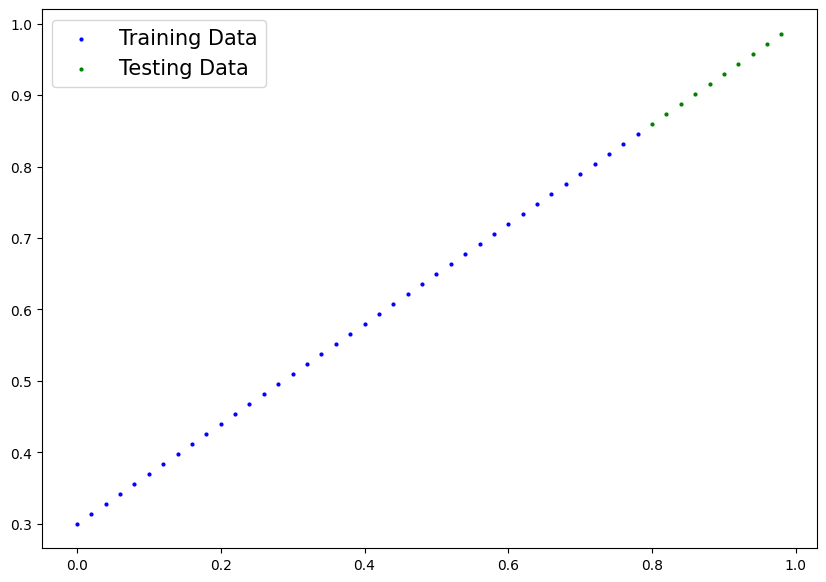

In [ ]:
plot_predictions()

##Building pytorch model

We will be building a linear regression model

our model starts with random values and adjusts these values to get ideal values

We can do this in two ways

1) gradient descent

2) back propogation

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float)) #We have requires grad to True for gradient descent, pytorch will keep track of the gradients of the weights parameter and update them through gradient descent and back propogration
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad = True, #This parameter can be updated via gradient descent
                                        dtype=torch.float))

    #any subclass of nn.Module requires a forward method
    #forward defines the computation performed by the model, in this case it is linear regression
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #This is the linear regression formula

###Pytorch model building essentials

* torch.nn -- contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter -- the parameters our model needs to try and learn

* torch.nn.Module -- The base class for all neural network modules, if we subclass it we must override forward()

* torch.optim - this is where the optimizers are, helps with gradient descent

* def forward() -- All nn.Module subclasses require us to overwrite forward. This method defines what happens in the forward computation

In [ ]:
#We will make a random seed as our model uses .randn
torch.manual_seed(42)

#Instance of the model that we have made
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict() #gives a dictionary which is easier to read than our list

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###making predictions using torch.inference_mode()

To check our model's power we will see how well it predicts y_test based on X_test

We are doing this as of now without optimising our model's weight and bias

When we pass data through our model, it'll run through the forward() method

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
#this is a context manager, can be done directly without it but put this in
# It basically turns off gradient tracking which makes it faster as pytorch has to keep track of a lesser amount of data
#can use torch.no_grad() as well but inference_mode() is better and newer
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

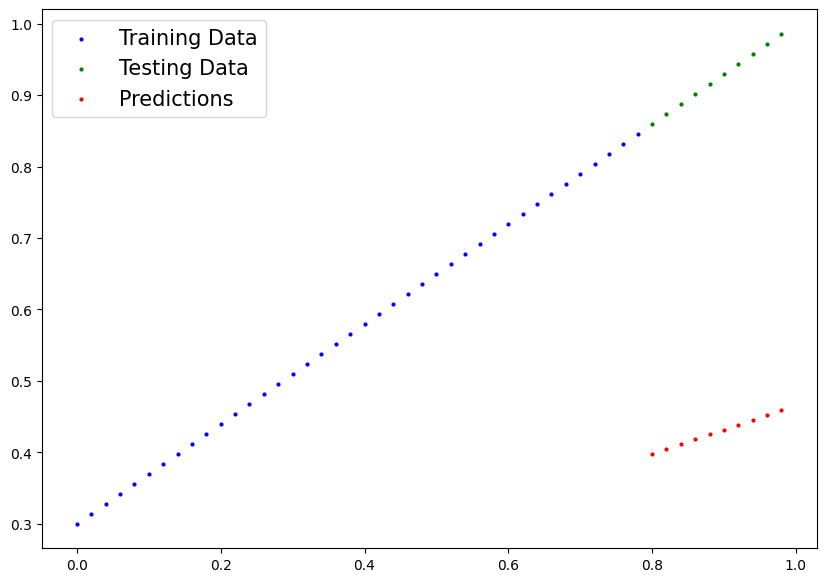

In [ ]:
plot_predictions(predictions=y_preds) #The predictions are far off as we haven't trained our model yet, we have just run it using the random initial values

###Training our model

We need a loss function

We need an optimizer, which takes into account the loss of a model and adjusts our parameters

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Setting up a loss function
loss_fn = nn.L1Loss()

#Setting up an optimizer
#stochastic gradient descent
#lr is the learning rate
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

###Building a training and testing loop

Things we need in a training loop:

0) Loop through the data

1) Forward pass (this involves the data moving through our forward method) -- also called forward propagation

2) Calculate the loss

3) Optimizer zero grad

4) Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (back propagation)

5) Optimizer step - Use the optimizer to adjust our model's parameters to improve the loss (gradient descent)

In [ ]:
#An epoch is one loop through the data (This is a hyperparameter as we have set is ourselves, so is the learning rate)
torch.manual_seed(42)
epochs = 200

#Keeping track of different values so we can compare future experiments to past experiments
epoch_count = []
loss_values = []
test_loss_values = []

#Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train mode in pytorch sets all parameters that require gradients to require gradients

  #1 forward pass, basically calculating f
  y_pred = model_0(X_train) # we will be comparing this with the y_test to minimise loss

  #2 calculating the loss using the loss function we set up
  #The order is predictions first then the actual labels, check the documentation just to be safe, in this case it is MAE so the order doesn't matter but it might matter in some cases
  loss = loss_fn(y_pred, y_train)

  #3 Optimiser zero grad
  optimizer.zero_grad()

  #4 Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  #5 Step the optimizer (perform gradient desecnt), updates our parameters
  optimizer.step() #by deafult how the optimizer changes will accumulate through the loop, so we are zeroing it in step 3


  ###Testing code
  model_0.eval() #turns off settings in the model not needed for evaluation and testing
  with torch.inference_mode(): #this turns off gradient tracking
    #1 Do the forward pass
    y_preds_eval = model_0(X_test)

    #2 Calculate the loss
    test_loss = loss_fn(y_preds_eval, y_test)

  if(epoch % 10 == 0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

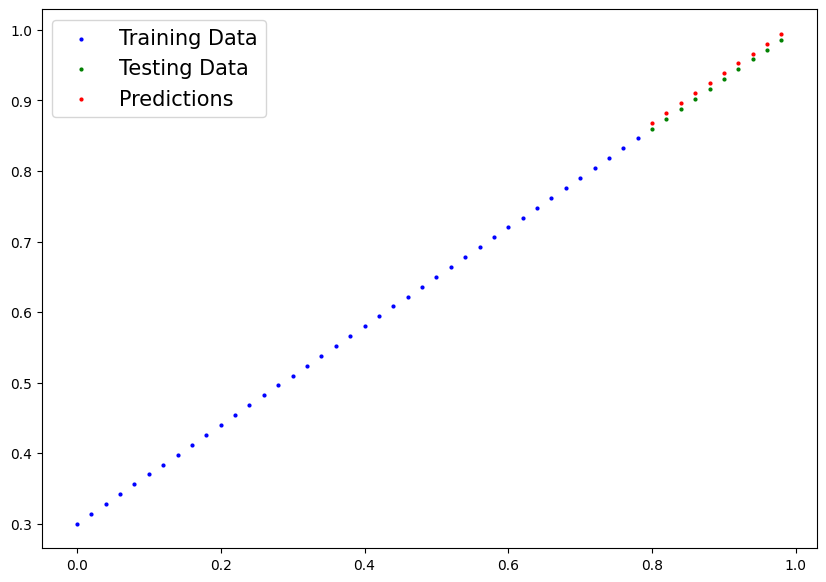

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
torch.tensor(loss_values), loss_values

(tensor([0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089,
         0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089,
         0.0089, 0.0089]),
 [tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackwar

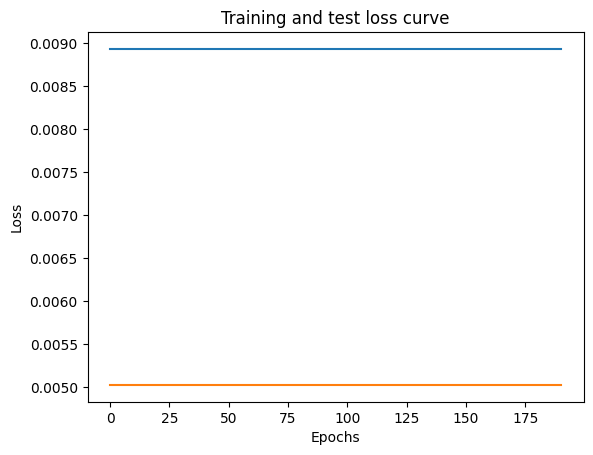

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values), label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

##Saving a model in pytorch

There are three main methods for saving and loading

1) torch.save() -- allows us to save a pytorch object in python's pickle format

2) torch.load() -- allows us to load a saved pytorch object

3) torch.nn.Module.load_state_dict() -- this allows us to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Saving our pytorch model
from pathlib import Path

#1 we will create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2 Create a model save path
MODEL_NAME = "pytorch_workflow_model_0.pth" #.pth is extension used to save models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3 save the model state_dict, we could save the entire model but this is recommended
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


##Loading a pytorch model

since we saved just the state_dict and not the entire model, we will create a new instance of our model class and load the state_dict() there

In [ ]:
loaded_model_0 = LinearRegressionModel()

#loading the saved state_dict of model_0 which will update the new instance with the updated parameters

In [ ]:
loaded_model_0.state_dict(), model_0.state_dict()

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

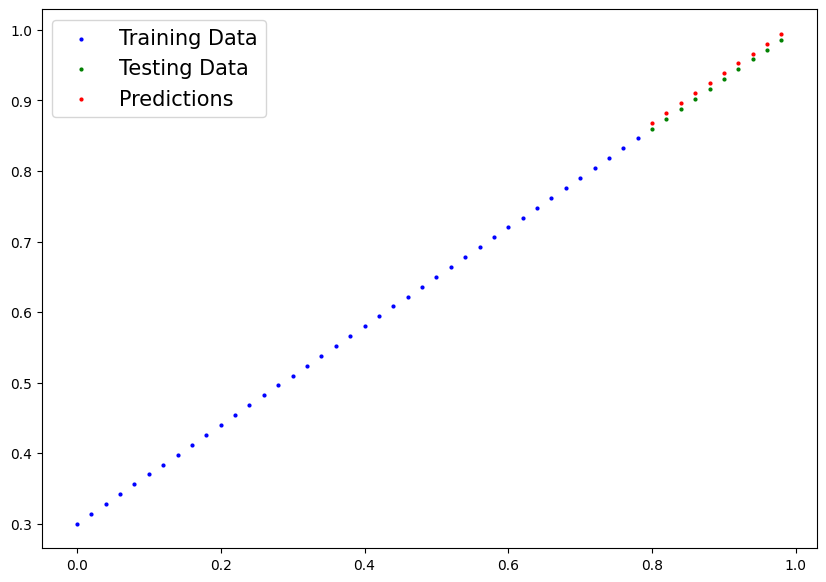

In [ ]:
#making predictions with our saved model

loaded_model_0.eval()
with torch.inference_mode():
  y_pred_loaded = loaded_model_0(X_test)

plot_predictions(predictions=y_pred_loaded)

### Exercise -- doing it all on my own

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### Creating the data

In [ ]:
X_data = torch.arange(0,1,0.02)

weight = 0.4
bias = 0.9

y_data = bias + (X_data * weight)


In [ ]:
train_split = int((0.8 * len(X_data)))

X_train = X_data[:train_split]
y_train = y_data[:train_split]

X_test = X_data[train_split:]
y_test = y_data[train_split:]

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend()
  plt.show()


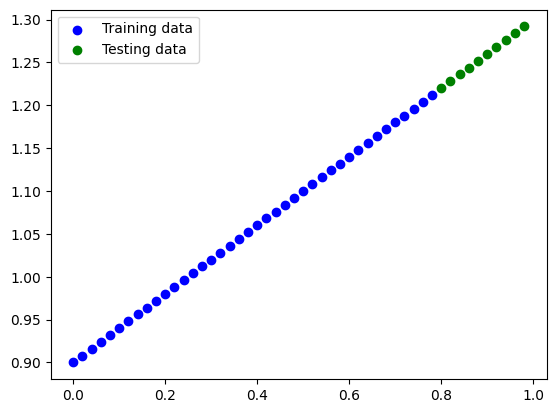

In [ ]:
plot_predictions()

### Creating the linear regression model

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True))

    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True))
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(0)
model_self_0 = LinearRegression()
model_self_0.state_dict()

OrderedDict([('bias', tensor([1.5410])), ('weight', tensor([-0.2934]))])

### Creating a loss function and optimiser

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_self_0.parameters(), lr=0.01)


###Writing the training and testing loop

In [ ]:
epochs = 1000
torch.manual_seed(0)
epoch_count=[]
training_loss=[]
testing_loss=[]

for epoch in range(epochs):
  model_self_0.train()

  y_predictions = model_self_0(X_train)

  loss = loss_fn(y_predictions, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_self_0.eval()
  with torch.inference_mode():
    y_evals = model_self_0(X_test)

    loss_evals = loss_fn(y_evals, y_test)

  if(epoch%10==0):
    epoch_count.append(epoch)
    training_loss.append(loss)
    testing_loss.append(loss_evals)


In [ ]:
y_predictions

tensor([0.8985, 0.9064, 0.9143, 0.9222, 0.9301, 0.9380, 0.9460, 0.9539, 0.9618,
        0.9697, 0.9776, 0.9855, 0.9934, 1.0013, 1.0093, 1.0172, 1.0251, 1.0330,
        1.0409, 1.0488, 1.0567, 1.0646, 1.0725, 1.0805, 1.0884, 1.0963, 1.1042,
        1.1121, 1.1200, 1.1279, 1.1358, 1.1437, 1.1517, 1.1596, 1.1675, 1.1754,
        1.1833, 1.1912, 1.1991, 1.2070], grad_fn=<AddBackward0>)

In [ ]:
model_self_0.state_dict()

OrderedDict([('bias', tensor([0.9085])), ('weight', tensor([0.3995]))])

In [ ]:
weight, bias

(0.4, 0.9)

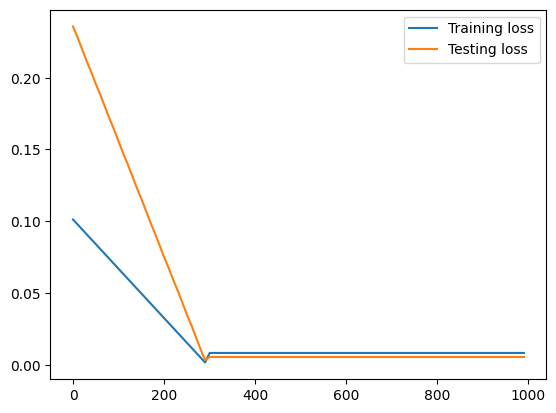

In [ ]:
plt.plot(epoch_count, torch.tensor(training_loss), label="Training loss")
plt.plot(epoch_count, torch.tensor(testing_loss), label="Testing loss")
plt.legend()
plt.show()

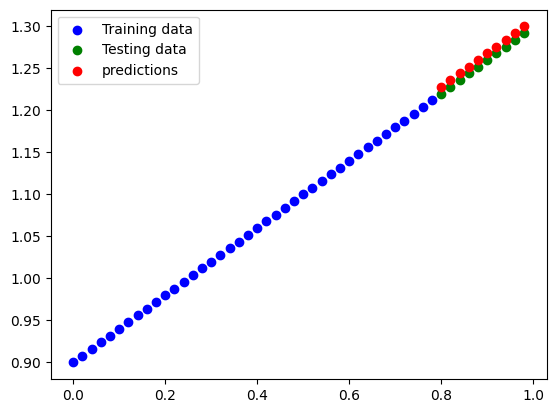

In [ ]:
with torch.inference_mode():
  y_predict = model_self_0(X_test)

plot_predictions(predictions=y_predict)

###Exercises

Refer to https://www.learnpytorch.io/01_pytorch_workflow/ for the questions

In [88]:
#1
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

weight = 0.3
bias = 0.9
X_data = torch.arange(0,1,0.01).unsqueeze(dim=1)
y_data = bias + weight*X_data

train_split = int(0.8 * len(X_data))
X_train = X_data[:train_split]
y_train = y_data[:train_split]

X_test = X_data[train_split:]
y_test = y_data[train_split:]

X_data.shape

torch.Size([100, 1])

In [89]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="b", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predicted Data")

  plt.legend()
  plt.show()

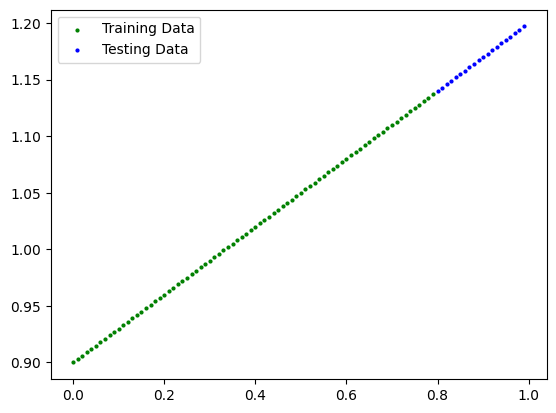

In [90]:
plot_predictions()

In [91]:
#2
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,
                            out_features=1)
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear(x)


In [92]:
torch.manual_seed(42)
model_exercise = LinearRegression()
model_exercise.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [93]:
#3

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_exercise.parameters(),
                            lr = 0.01)


In [94]:
torch.manual_seed(42)
epochs = 300

epoch_count = []
testing_loss = []
for epoch in range(epochs):
  model_exercise.train()
  y_pred = model_exercise(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 20 == 0:
    epoch_count.append(epoch)

    model_exercise.eval()
    with torch.inference_mode():
      y_evaluate = model_exercise(X_test)
      eval_loss = loss_fn(y_evaluate, y_test)
    testing_loss.append(eval_loss)


In [95]:
epoch_count, testing_loss

([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
 [tensor(0.3365),
  tensor(0.2184),
  tensor(0.1746),
  tensor(0.1531),
  tensor(0.1368),
  tensor(0.1208),
  tensor(0.1045),
  tensor(0.0881),
  tensor(0.0722),
  tensor(0.0558),
  tensor(0.0395),
  tensor(0.0235),
  tensor(0.0072),
  tensor(0.0071),
  tensor(0.0071)])

In [96]:
model_exercise.state_dict()

OrderedDict([('linear.weight', tensor([[0.3028]])),
             ('linear.bias', tensor([0.8910]))])